<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Heatmap_with_model_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_temp_30.zip

Archive:  /content/models_temp_30.zip
   creating: content/models/
  inflating: content/models/model 18  
  inflating: content/models/model 7  
  inflating: content/models/model 27  
  inflating: content/models/model 25  
  inflating: content/models/model 10  
  inflating: content/models/model 24  
  inflating: content/models/model 16  
  inflating: content/models/model 23  
  inflating: content/models/model 1  
  inflating: content/models/model 3  
  inflating: content/models/model 0  
  inflating: content/models/model 20  
  inflating: content/models/model 29  
  inflating: content/models/model 17  
  inflating: content/models/model 2  
  inflating: content/models/model 14  
  inflating: content/models/model 6  
  inflating: content/models/model 28  
  inflating: content/models/model 22  
  inflating: content/models/model 8  
  inflating: content/models/model 15  
  inflating: content/models/model 4  
  inflating: content/models/model 26  
  inflating: content/models/model 5  
  infl

In [6]:
feature = pd.read_excel('/content/Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')
label = pd.read_excel('/content/data_big_4.xlsx',sheet_name='Sheet2')
feature.pop('Jam')
feature.pop('Fan')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
187    1.0
188    1.0
189    1.0
190    1.0
191    1.0
Name: Fan, Length: 192, dtype: float64

In [8]:
label.head()

,koor_x,koor_y,Vx,Vy,Temp
0,1,30,0.002399,-0.073255,27.417225
1,1,63,0.002269,-0.075449,27.366829
2,1,94,0.002446,-0.076216,27.273479
3,1,113,0.002551,-0.073114,27.065680
4,1,145,0.002307,-0.072831,26.763813


In [15]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y'],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  array_y.append(frame)

In [16]:
len(array_y)

30

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [18]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [19]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
for i in range(192):
  a = y[...,i,0]
  b = y_predict[...,i]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [20]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [21]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-0.612138,1.303766,2.985403
std,4.657892,0.890144,3.497176
min,-45.484550,0.211061,0.063761
25%,-0.077857,0.482135,0.313526
50%,0.668698,1.202820,1.755993
75%,0.913970,1.932922,4.494919
max,0.982466,3.926666,17.821575


In [22]:
y.shape,y_predict.shape

((30, 192, 1), (30, 192))

In [23]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

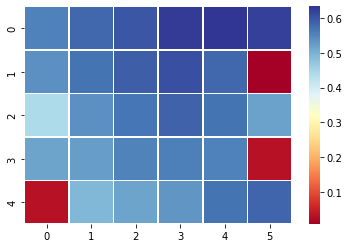

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

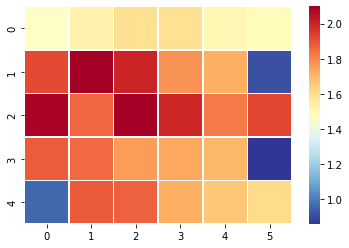

In [25]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

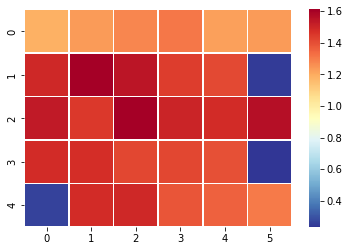

In [26]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [27]:
! mkdir subplot

In [28]:
df_koor = pd.read_excel('koordinat.xlsx',header=None,names=['koor_x','koor_y'])

In [29]:
df_koor.head()

,koor_x,koor_y
0,2.5,3
1,2.5,4
2,2.5,5
3,2.5,6
4,2.5,7


In [30]:
def suhu(y):
  df_y = pd.DataFrame(y)
  df_z = pd.DataFrame(y)
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y

In [34]:
suhu(y[(...,1,0)])

,suhu,koor_x,koor_y
0,28.444975,2.5,3
1,28.245829,2.5,4
2,28.047821,2.5,5
3,27.738127,2.5,6
4,27.366634,2.5,7
5,26.976025,2.5,8
6,30.841417,2.5,9
7,30.530779,2.5,10
8,30.161697,2.5,11
9,29.721525,2.5,12


In [31]:
from plotly.subplots import make_subplots
for i in range(30):
  a = y[(...,i,0)]
  b = y_predict[(...,i)]
  a = np.array(a)
  b = np.array(b)
  a = suhu(a)
  b = suhu(b)
  
  fig = make_subplots(rows=1, cols=2)

  fig.add_contour(
     z = a['suhu'].tolist(),
     x = a['koor_x'].tolist(),
     y = a['koor_y'].tolist(),
     row=1, col=1
  )

  fig.add_contour(
     z = b['suhu'].tolist(),
     x = b['koor_x'].tolist(),
     y = b['koor_y'].tolist(),
     row=1, col=2
  )
  fig.write_image(f'/content/subplot/fig {i}.png')

In [32]:
!zip -r /content/subplot.zip /content/subplot

  adding: content/subplot/ (stored 0%)
  adding: content/subplot/fig 15.png (deflated 3%)
  adding: content/subplot/fig 16.png (deflated 3%)
  adding: content/subplot/fig 28.png (deflated 3%)
  adding: content/subplot/fig 23.png (deflated 4%)
  adding: content/subplot/fig 5.png (deflated 5%)
  adding: content/subplot/fig 2.png (deflated 4%)
  adding: content/subplot/fig 21.png (deflated 4%)
  adding: content/subplot/fig 7.png (deflated 5%)
  adding: content/subplot/fig 12.png (deflated 3%)
  adding: content/subplot/fig 27.png (deflated 3%)
  adding: content/subplot/fig 17.png (deflated 4%)
  adding: content/subplot/fig 25.png (deflated 4%)
  adding: content/subplot/fig 22.png (deflated 4%)
  adding: content/subplot/fig 8.png (deflated 4%)
  adding: content/subplot/fig 14.png (deflated 4%)
  adding: content/subplot/fig 18.png (deflated 4%)
  adding: content/subplot/fig 29.png (deflated 4%)
  adding: content/subplot/fig 13.png (deflated 4%)
  adding: content/subplot/fig 10.png (deflated 